# Prac Week 3 (Nearest Neighbours)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import os
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [76]:
# @title Classification
# load the dataset
path_cla = os.path.join(os.getcwd(), 'W3/w3classif.csv')
data = pd.read_csv(path_cla, names=["X1", "X2", "Y"])

## Question 1 (Classification)

Text(0.5, 0, 'X2')

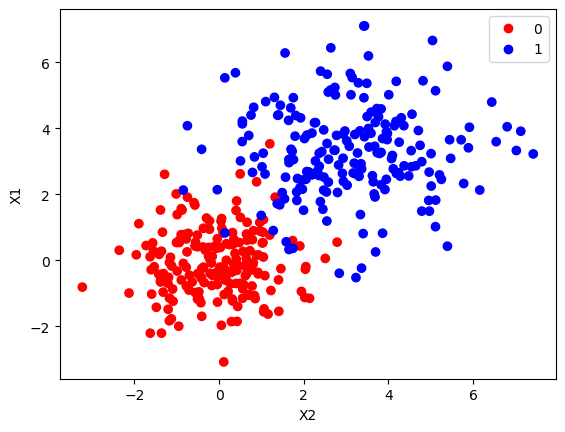

In [77]:
# @title X1 vs X2

from matplotlib.colors import ListedColormap

fig = plt.figure()
colours = ListedColormap(['r','b'])
scatter = plt.scatter(data.loc[:,"X1"], data.loc[:,"X2"], c=data.loc[:,"Y"], cmap=colours, label=data.loc[:,"Y"])
plt.legend(*scatter.legend_elements())
plt.ylabel('X1')
plt.xlabel('X2')

## Question 2

In [78]:
# @title Split dataset
#split dataset into features and targets
X = data.drop("Y", axis=1)
y = data["Y"]

from sklearn.model_selection import train_test_split

# split into train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Question 3

### (a)

In [79]:
# @title Build and train a classifier

# create classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# TODO: fit the model on the training data

knn.fit(X=X_train, y=y_train)

# make predictions on training data and calculate training Misclassification Rate

predict_train = knn.predict(X=X_train)

miss_train = accuracy_score(y_true=y_train, y_pred=predict_train)

print(f'Training Misclassification Rate: {"%0.5f" % ((1 - miss_train) * 100)} %')

# make predictions on the test data and calculate test Misclassification Rate

predict_test = knn.predict(X=X_test)

miss_test = accuracy_score(y_true=y_test, y_pred=predict_test)

print(f'Testing Misclassification Rate: {"%0.5f" % ((1 - miss_test) * 100)} %')

Training Misclassification Rate: 1.78571 %
Testing Misclassification Rate: 5.83333 %


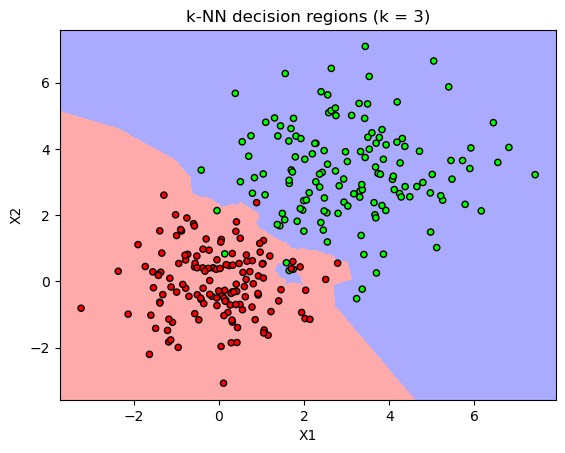

In [80]:
# @title Plotting the decision boundary for training data

X1_train = X_train.loc[:, "X1"]
X2_train = X_train.loc[:, "X2"]

# Generate a meshgrid of points to cover the feature space
h = 0.02
x_min, x_max = X1_train.min() - 0.5, X1_train.max() + 0.5
y_min, y_max = X2_train.min() - 0.5, X2_train.max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the points in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

# Plot the training data points
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.scatter(X1_train, X2_train, c=y_train, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('k-NN decision regions (k = %d)' % k)
plt.show()

### (c)

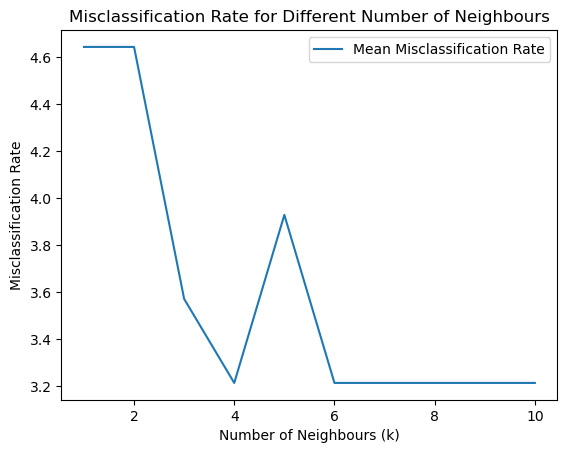

Optimal Value of k: 4


In [81]:
n_neighbors = [i for i in range(1, 11)]

parameters = {'n_neighbors': n_neighbors}

knn = KNeighborsClassifier()
gs_clf = GridSearchCV(estimator=knn, param_grid=parameters)

gs_clf.fit(X=X_train, y=y_train)

fig, ax = plt.subplots()

cr = np.array(gs_clf.cv_results_['mean_test_score'])
mcr = (1 - cr) * 100

ax.plot(n_neighbors, mcr, label='Mean Misclassification Rate')

plt.legend()
plt.title('Misclassification Rate for Different Number of Neighbours')
plt.ylabel('Misclassification Rate')
plt.xlabel('Number of Neighbours (k)')
plt.show()

print(f'Optimal Value of k: {np.where(mcr == np.min(mcr))[0][0] + 1}')

# Question 1 (Regression)

In [82]:
# @title Regression

# load the dataset
path_reg = os.path.join(os.getcwd(), "W3/w3regr.csv")
data_reg = pd.read_csv(path_reg, names=["X", "Y"])

#split dataset into features and targets
X = data_reg.drop("Y", axis=1)
y = data_reg["Y"]

# split into train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

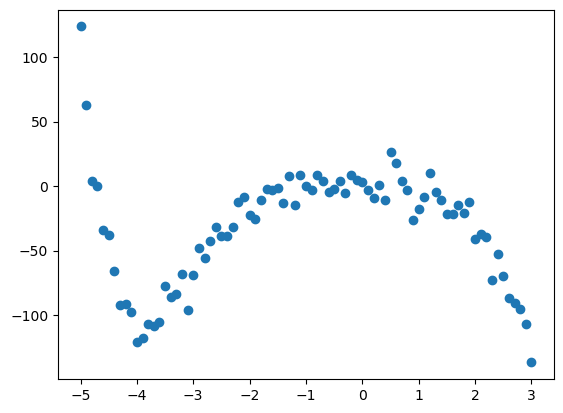

In [83]:
# @title X vs Y
plt.scatter(X, y)
plt.show()

## Question 4

### (a)

In [84]:
# @title Build and train and regressor

# create classifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k = 3
knr = KNeighborsRegressor(n_neighbors=k)

# fit the model on the training data

knr.fit(X=X_train, y=y_train)

# make predictions on training data and evaluate the model using mean squared error

predict_train = knr.predict(X=X_train)

mse_train = mean_squared_error(y_true=y_train, y_pred=predict_train)

print(f'Training MSE: {"%0.5f" % mse_train}')

# make predictions on the test data and evaluate the model using mean squared error

predict_test = knr.predict(X=X_test)
mse_test = mean_squared_error(y_true=y_test, y_pred=predict_test)

print(f'Testing MSE: {"%0.5f" % mse_test}')


Training MSE: 174.63771
Testing MSE: 241.91775


### (b)

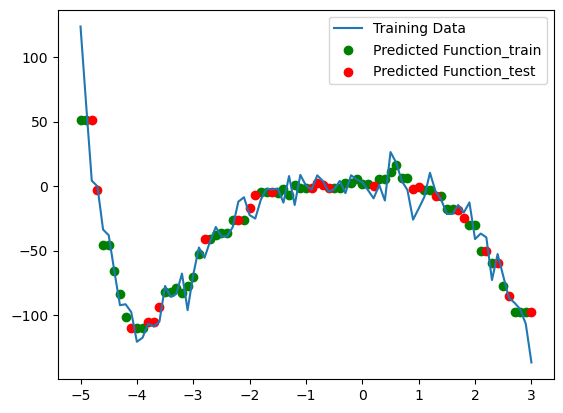

In [85]:
# Plot the training data, testing data, and predicted function
fig, ax = plt.subplots()

ax.plot(X, y, label='Training Data')

ax.scatter(X_train, predict_train, c= 'g', label='Predicted Function_train')
ax.scatter(X_test, predict_test, c ='r', label='Predicted Function_test')

plt.legend()
plt.show()

### (c)

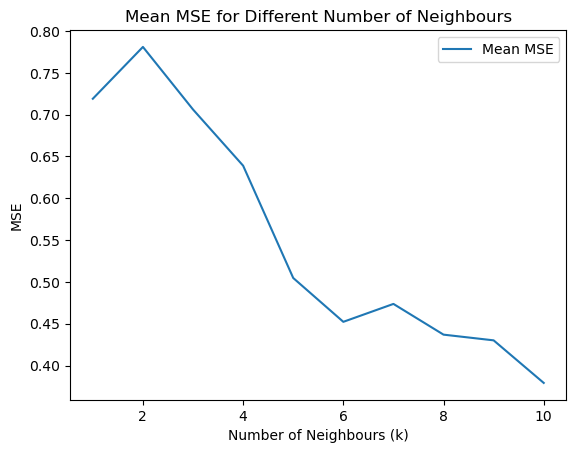

Optimal Value of k: 9


In [86]:
n_neighbors = [i for i in range(1, 11)]

parameters = {'n_neighbors': n_neighbors}

knr = KNeighborsRegressor()
gs_clf = GridSearchCV(estimator=knr, param_grid=parameters)

gs_clf.fit(X=X_train, y=y_train)

fig, ax = plt.subplots()

errors = np.array(gs_clf.cv_results_['mean_test_score'])

ax.plot(n_neighbors, errors, label='Mean MSE')

plt.legend()
plt.title('Mean MSE for Different Number of Neighbours')
plt.ylabel('MSE')
plt.xlabel('Number of Neighbours (k)')
plt.show()

print(f'Optimal Value of k: {np.where(errors == np.min(errors))[0][0]}')

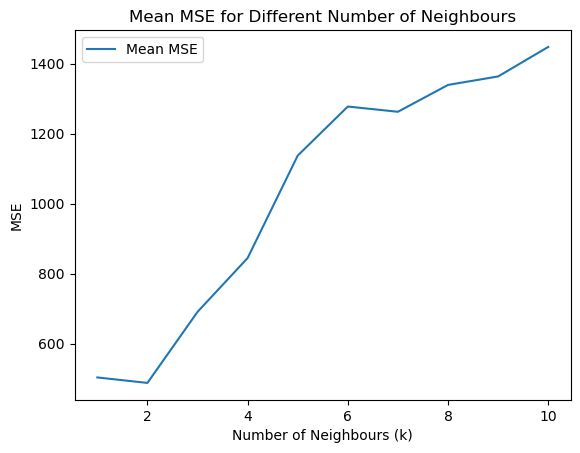

Optimal Value of k: 2


In [87]:
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error, greater_is_better=False)

n_neighbors = [i for i in range(1, 11)]

parameters = {'n_neighbors': n_neighbors}

knr = KNeighborsRegressor()
gs_clf = GridSearchCV(estimator=knr, param_grid=parameters, scoring=mse)

gs_clf.fit(X=X_train, y=y_train)

fig, ax = plt.subplots()

errors = -1 * np.array(gs_clf.cv_results_['mean_test_score'])

ax.plot(n_neighbors, errors, label='Mean MSE')

plt.legend()
plt.title('Mean MSE for Different Number of Neighbours')
plt.ylabel('MSE')
plt.xlabel('Number of Neighbours (k)')
plt.show()

print(f'Optimal Value of k: {np.where(errors == np.min(errors))[0][0] + 1}')